In [1]:
import warnings;warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SUPERVISED LEARNING

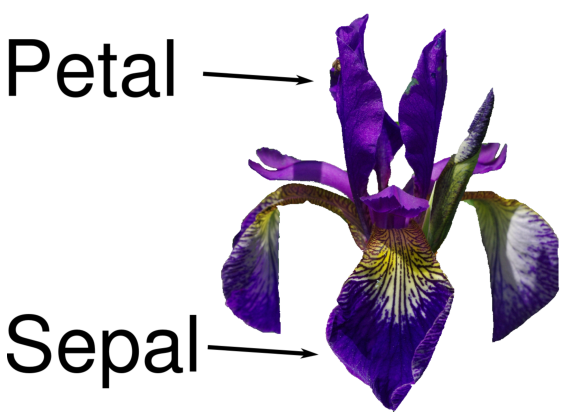

In [2]:
d=plt.imread('./iris_petal_sepal.png')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(d)

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
print(iris['feature_names'])
print(iris['target_names'])
x=iris.data
y=iris.target
#读取iris数据 4特征，3分类 
#input/feature: 花瓣的长度和宽度 花萼的长度和宽度
#output/target/label: setosa versicolor virginica

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
x.shape

(150, 4)

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
y.shape

(150,)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.7,random_state=0)

In [9]:
x_train.shape

(105, 4)

In [10]:
y_train.shape

(105,)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
print("train score:"+str(knn.score(x_train,y_train)))
print("test score:"+str(knn.score(x_test, y_test)))

train score:0.9619047619047619
test score:0.9777777777777777


# UNSUPERVISED LEARNING(k均值聚类)

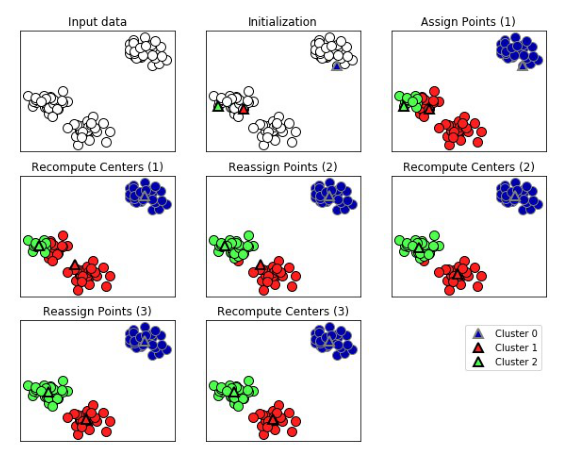

In [12]:
d=plt.imread('./kmeans_algorithm.jpg')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(d)

In [13]:
#创建数据集 关键参数:样本数量，中心个数
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=500,random_state=2,centers=5)

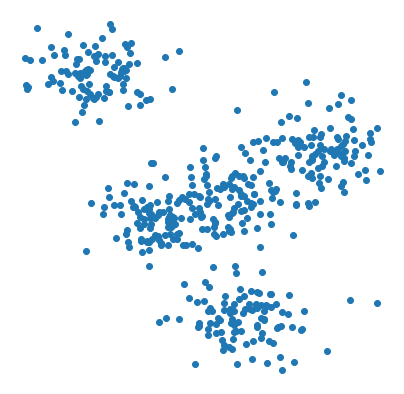

In [14]:
X=pd.DataFrame(x)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.scatter(X.iloc[:,0],X.iloc[:,1])

In [15]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
#k均值聚类
#kmeans.labels_

KMeans(n_clusters=5)

In [16]:
Y=pd.DataFrame(kmeans.labels_)
aggregate=pd.concat([X,Y],axis=1)
aggregate.columns=['x-axis','y-axis','classification']
aggregate

,x-axis,y-axis,classification
0,-1.394523,-9.979650,2
1,-6.499994,2.697023,1
2,-3.616208,-4.700975,4
3,0.390109,-1.251595,3
4,-2.700083,-3.569590,0
...,...,...,...
495,-4.989807,3.661246,1
496,-5.896993,2.864224,1
497,0.513264,-2.313201,3
498,-5.068314,2.535247,1


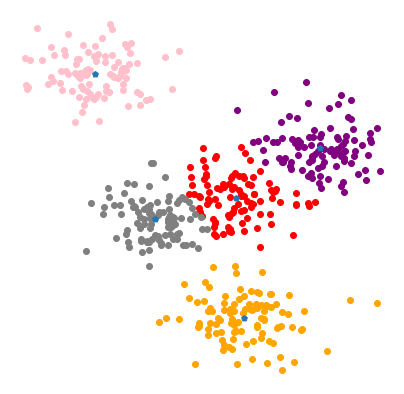

In [17]:
plt.figure(figsize=(7,7))
plt.axis('off')
plt.scatter(aggregate[aggregate['classification']==0].iloc[:,0],aggregate[aggregate['classification']==0].iloc[:,1],c='red')
plt.scatter(aggregate[aggregate['classification']==1].iloc[:,0],aggregate[aggregate['classification']==1].iloc[:,1],c='pink')
plt.scatter(aggregate[aggregate['classification']==2].iloc[:,0],aggregate[aggregate['classification']==2].iloc[:,1],c='orange')
plt.scatter(aggregate[aggregate['classification']==3].iloc[:,0],aggregate[aggregate['classification']==3].iloc[:,1],c='purple')
plt.scatter(aggregate[aggregate['classification']==4].iloc[:,0],aggregate[aggregate['classification']==4].iloc[:,1],c='grey')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='p')
plt.show()

# 参数过拟合的风险与验证集

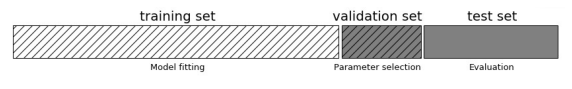

In [18]:
d=plt.imread('./threefold_split.jpg')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(d)

In [19]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.model_selection import train_test_split
#将数据分为训练+验证集和测试集
x_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
#将数据分为训练和验证集
x_train,x_valid,y_train,y_valid= train_test_split(x_trainval, y_trainval, random_state=1)
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for c in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=c)
        svm.fit(x_train,y_train)
        score=svm.score(x_valid,y_valid)
        if score>best_score:
            best_score=score
            best_parameter={'c':c,'gamma':gamma}
        else:
            pass
print(best_score)
print(best_parameter)

0.9642857142857143
{'c': 10, 'gamma': 0.001}


In [20]:
#在训练+验证集上重新构建一个模型，并在测试集上进行评估
svm=SVC(gamma=0.001,C=10)
svm.fit(x_trainval,y_trainval)
score=svm.score(x_test,y_test)
score

0.9210526315789473

# 神经网络（深度学习）

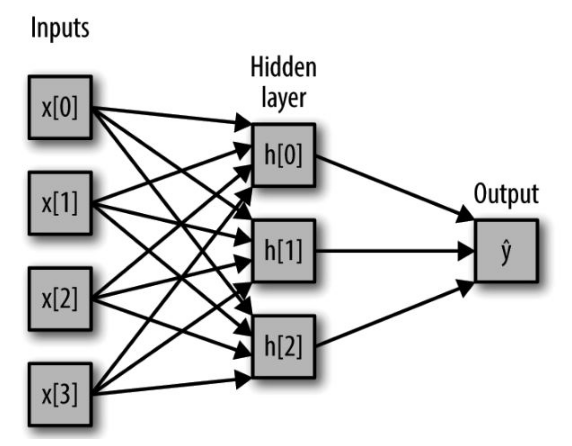

In [21]:
d=plt.imread('./single_hidden_layer.jpg')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(d)